In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Select a basket of stocks to work with. They can pick their own.
# selected = ['CNP', 'F', 'WMT',  'GE', 'TSLA']
new_file = pd.read_csv(filepath_or_buffer='WIKI-PRICES.csv',sep=',',usecols=['date','ticker','open'])
# new_file['ZUMZ'] = new_file['ZUMZ'].fillna(0)
clean = new_file.set_index('date')

new_file = clean.pivot(columns='ticker')

# new_file.pivot(columns='ticker')
new_file

open              
ticker        ZQK    ZTS   ZUMZ
date                           
1994-01-04  14.88    NaN    NaN
1994-01-05  15.13    NaN    NaN
1994-01-06  15.75    NaN    NaN
1994-01-07  14.88    NaN    NaN
1994-01-10  14.62    NaN    NaN
...           ...    ...    ...
2018-03-21    NaN  84.87  23.80
2018-03-22    NaN  83.35  23.90
2018-03-23    NaN  82.16  23.55
2018-03-26    NaN  81.88  23.75
2018-03-27    NaN  84.08  24.65

[6100 rows x 3 columns]

In [54]:
returns_daily = new_file.pct_change()
returns_annual = returns_daily.mean() * 250 
returns_annual

      ticker
open  ZQK       0.064938
      ZTS       0.216554
      ZUMZ      0.199561
dtype: float64

In [56]:
# Get the daily covariance of returns of the stock.
# This is effectively, how much does one stock deviate from the mean.
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250
cov_annual

open                    
ticker            ZQK       ZTS      ZUMZ
     ticker                              
open ZQK     0.396973  0.001583  0.114217
     ZTS     0.001583  0.054112  0.010931
     ZUMZ    0.114217  0.010931  0.363773

In [68]:
# Now calculate the efficient frontier - over 50,000 permutations of the stocks
port_returns = []
port_volatility = []
stock_weights = []
selected = ['ZQK','ZTS','ZUMZ']
num_assets = len(selected)
num_portfolios = 50000
# Set a random seed, for reprodicibility
np.random.seed(200)

In [69]:
for p in range(num_portfolios):
    
    # Calculate a random weight, and make it a percentage of 
    # all the weights calculated for this basket.
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate the returns for this weighting of stocks, 
    # using the annual returns
    returns = np.dot(weights, returns_annual)
    
    # Calculate the volatility for this weighting of stocks, 
    # using the annual coveriance values
    # Effictively std. deviation
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    # Store the values for this portfolio
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [70]:
# Add a dictionary for Returns and Risk values of each portfolio
portfolio = { 'Returns': port_returns, 'Volatility': port_volatility }
print(portfolio)

{'Returns': [0.12960526507071743, 0.16218576322032388, 0.18060859130543072, 0.15814069615709653, 0.14209408092871056, 0.1969949562775425, 0.2012255017049642, 0.17167808172821172, 0.16791953838742651, 0.14354793788898965, 0.15083367911622028, 0.16170860634204048, 0.13333108115232448, 0.16223127534357118, 0.15987977513434176, 0.19514861531927027, 0.19021126428485727, 0.08974669759077068, 0.14231558708035225, 0.15705589851740598, 0.15732704811095918, 0.15758285683071288, 0.17961836849989066, 0.15320719779756037, 0.18410824442735596, 0.15520016518536595, 0.14095844582663847, 0.1735901435741792, 0.19003474024184075, 0.13994573074654465, 0.1701595273341894, 0.19376027982506927, 0.14374483940887922, 0.1440235656563486, 0.12472075035102485, 0.14290452753594207, 0.19940667202267914, 0.18545188745748215, 0.1575982103405238, 0.18702487676902715, 0.1578548305987173, 0.16859923119563408, 0.20402137194305917, 0.1432001717929906, 0.13434416234576477, 0.16545859859777431, 0.1822484757590655, 0.1774722

In [71]:
# Extend the dictionary, to accomdate each ticker and weight in the portfolio
for counter, symbol in enumerate(selected):
    portfolio[symbol + ' Weight'] = [Weight[counter] for Weight in stock_weights]

In [72]:
# Finally! Make a DataFrame...
df = pd.DataFrame(portfolio)
                                     
# What's our data look like?
df.head()

,Returns,Volatility,ZQK Weight,ZTS Weight,ZUMZ Weight
0,0.129605,0.445245,0.535809,0.128094,0.336096
1,0.162186,0.272105,0.358324,0.639282,0.002393
2,0.180609,0.271263,0.207419,0.527910,0.264671
3,0.158141,0.356147,0.346292,0.305926,0.347782
4,0.142094,0.428409,0.445363,0.146495,0.408142


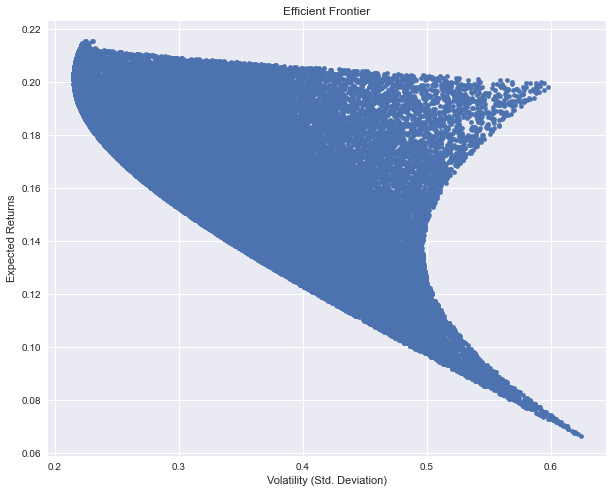

In [73]:
# Visualize the frontier!
# Use a scatter plot, and use seaborn colour styling...
plt.style.use('seaborn')
df.plot.scatter(x='Volatility',y='Returns',figsize=(10,8),grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()